# Ejercicio de casa: Regresión Múltiple

In [ ]:
# Instala dependencias
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/BaseEjerciciosRegresionMultiple.sav
!pip install pingouin
!pip install pyreadstat

In [1]:
import pandas as pd

df = pd.read_spss("BaseEjerciciosRegresionMultiple.sav")
df

,Código,Mot_Log,Autoconcepto,Rend_Acad
0,001,8.0,8.0,18.0
1,002,10.0,8.0,19.0
2,003,8.0,6.0,18.0
3,004,8.0,7.0,19.0
4,005,7.0,8.0,18.0
5,006,6.0,8.0,15.0
6,007,9.0,6.0,19.0
7,008,6.0,8.0,18.0
8,009,6.0,8.0,14.0
9,010,8.0,8.0,18.0


## Ejercicio 1

El estudio sobre los factores presentes en el rendimiento académico en estudiantes universitarios encontró que tanto la motivación de logro como el autoconcepto son variables predictoras significativas del rendimiento de las y los participantes. Ahora, se quiere conocer cuál es la contribución conjunta de ambos factores a la variabilidad del rendimiento académico y cuál de ellos es la variable más importante en su estimación.

a) Establece la hipótesis de trabajo (HT).

b) Señala las hipótesis estadísticas (H0 y H1) que correspondan a la HT.

c) Plantea la ecuación del modelo para la HT.

d) Evalúa los supuestos necesarios para continuar con el análisis de regresión.
- Linealidad
- Normalidad de residuos
- Multicolinealidad

e) Evalúa el ajuste del modelo planteado, interpretando el valor de R2 en términos de variabilidad explicada del rendimiento académico y los criterios de Cohen.

f) Indica si se cumplen las hipótesis y brinda tu conclusión.


HT: La motivación de logro y el autoconcepto predicen el rendimiento académico de las/los estudiantes universitarios.

$H_{0}$: $β_{motivación} = 0$, $β_{autoconcepto} = 0$, motivación de logro y autoconcepto no son predictores del rendimiento académico.

$H_{1}$: $β_{motivación} \neq 0$, $β_{autoconcepto} \neq 0$, motivación de logro y autoconcepto son predictores del rendimiento académico.

$Rendimiento \ académico = β_{0} + β_{1}(motivación logro) + β_{2}(autoconcepto) + \epsilon$, $β_{1} \neq 0$, $β_{2} \neq 0$ 

- Linealidad

In [2]:
import pingouin as pg

pg.normality(df[["Mot_Log", "Autoconcepto", "Rend_Acad"]])

,W,pval,normal
Mot_Log,0.940884,0.005933,False
Autoconcepto,0.885315,0.000040,False
Rend_Acad,0.942762,0.007212,False


In [3]:
print("Mot_Log")
print("Asimetría:", df["Mot_Log"].skew())
print("Curtosis:", df["Mot_Log"].kurtosis())

print("Autoconcepto")
print("Asimetría:", df["Autoconcepto"].skew())
print("Curtosis:", df["Autoconcepto"].kurtosis())

print("Rend_Acad")
print("Asimetría:", df["Rend_Acad"].skew())
print("Curtosis:", df["Rend_Acad"].kurtosis())

Mot_Log
Asimetría: 0.26456846488320906
Curtosis: -0.5634339568361888
Autoconcepto
Asimetría: 0.16307073781464598
Curtosis: -1.2304458281796782
Rend_Acad
Asimetría: 0.028725718470060186
Curtosis: -0.958126909649379


De acuerdo al análisis de normalidad con la prueba Shapiro-Wilk, las distribuciones de motivación de logro, SW =.94, p =.006, autoconcepto, SW =.89, p <.001, y rendimiento académico, SW =.94, p =.007, fueron no normales. 

Al revisar los indicadores de asimetría y curtosis, la no normalidad no fue considerada como problemática, por lo que se utilizó el índice paramétrico de correlación de Pearson para evaluar el supuesto de linealidad.

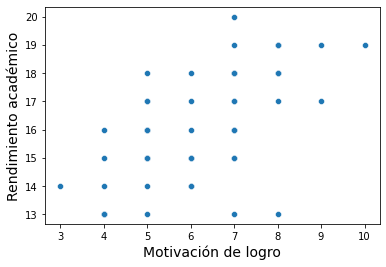

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="Mot_Log", y="Rend_Acad", data=df)
ax.set_xlabel("Motivación de logro", size=14)
ax.set_ylabel("Rendimiento académico", size=14)
plt.show()

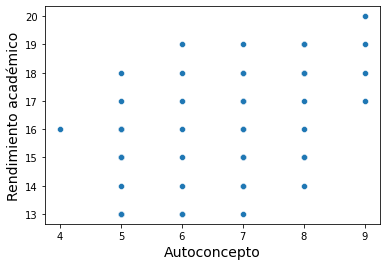

In [8]:
ax = sns.scatterplot(x="Autoconcepto", y="Rend_Acad", data=df)
ax.set_xlabel("Autoconcepto", size=14)
ax.set_ylabel("Rendimiento académico", size=14)
plt.show()

En los gráficos de dispersión se observan asociaciones positivas tanto de motivación de logro como de autoconcepto con rendimiento académico.

In [10]:
pg.pairwise_corr(
    columns=["Rend_Acad", "Autoconcepto", "Mot_Log"], method="pearson", data=df
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Rend_Acad,Autoconcepto,pearson,two-sided,60,0.514145,"[0.3, 0.68]",2.645734e-05,888.735,0.990902
1,Rend_Acad,Mot_Log,pearson,two-sided,60,0.644484,"[0.47, 0.77]",2.749418e-08,5.594e+05,0.999943
2,Autoconcepto,Mot_Log,pearson,two-sided,60,0.528110,"[0.32, 0.69]",1.446832e-05,1556.857,0.993916


Se encontró una asociación directa, significativa y grande, según el criterio de Cohen, entre motivación de logro y rendimiento académico, r(58)= .64, p<.001. Por su parte, el autoconcepto y el rendimiento se asociaron directa y significativamente, con una fortaleza alta, r(58)= .51, p<.001.

- Normalidad de los residuos

In [16]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model
model = smf.ols("Rend_Acad ~ Mot_Log + Autoconcepto", data=df).fit()
pg.normality(model.resid)

,W,pval,normal
0,0.970345,0.151699,True


La prueba de Shapiro-Wilk indica un SW =.97, p =.15, por lo que los residuos presentan distribución normal.

- Multicolinealidad 

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = model.model.exog

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = model.params.index

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(X, i) for i in range(model.model.exog.shape[1])
]
vif_data

,feature,VIF
0,Intercept,26.871309
1,Mot_Log,1.386770
2,Autoconcepto,1.386770


Motivación de logro: Tolerancia = .72 > .20, VIF = 1.39 < 3

Autoconcepto:     Tolerancia = .72 > .20, VIF = 1.39 < 3

Los resultados sugieren que las dos variables predictoras: motivación de logro y autoconcepto no tienen una relación lineal entre sí por lo que se cumple con el supuesto de independencia de variables.

En función a los supuestos evaluados, se realizará un análisis de regresión lineal múltiple. 


In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Rend_Acad   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     24.01
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           2.73e-08
Time:                        17:31:36   Log-Likelihood:                -105.90
No. Observations:                  60   AIC:                             217.8
Df Residuals:                      57   BIC:                             224.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.8684      0.970     10.169      0.000       7.925      11.812
Mot_Log          0.6529      0.145      4.501      0.000       0.362       0.943
Autoconcepto     0.3399      0.162      2.097      0.040       0.015       0.665
==============================================================================
Omnibus:                        1.872   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.788
Skew:                          -0.403   Prob(JB):                        0.409
Kurtosis:                       2.746   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El resultado de la prueba de ANOVA fue de F(2, 57)=24.01, p<.001, por lo que el modelo es adecuado para estimar el rendimiento académico de las y los estudiantes. Además, el R2 ajustado fue .438 por lo que se puede decir que el 43.8% de la variación que se observa en el rendimiento académico se explica por la motivación de logro y el autoconcepto. Según el criterio de Cohen (1988) el coeficiente de determinación es grande.

El análisis de regresión lineal múltiple indica que el $β_{0}=9.87$, $β_{motivación}= 0.653$, $p<.001$ y $β_{autoconcepto}= 0.34$, $p=.04$. 

En ambos casos se encontró que predicen de manera positiva y significativa al rendimiento académico. A cada incremento de una unidad en motivación de logro y de autoconcepto se observa un incremento de 0.653 y 0.34 en rendimiento académico, respectivamente. 

Por todo ello se concluye que la HT se cumple y que, en conjunto, la motivación de logro y el autoconcepto de estudiantes contribuyen a estimar su rendimiento académico. 

Rendimiento académico = 9.87 + 0.653 (motivación de logro) + 0.34 (autoconcepto) + 1.45

In [20]:
import numpy as np
from scipy import stats

model = smf.ols(
    "Rend_Acad ~ Mot_Log + Autoconcepto",
    data=df.select_dtypes(include=[np.number]).dropna().apply(stats.zscore),
).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Rend_Acad   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     24.01
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           2.73e-08
Time:                        17:35:13   Log-Likelihood:                -66.804
No. Observations:                  60   AIC:                             139.6
Df Residuals:                      57   BIC:                             145.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.498e-16      0.098  -2.56e-15      1.000      -0.195       0.195
Mot_Log          0.5172      0.115      4.501      0.000       0.287       0.747
Autoconcepto     0.2410      0.115      2.097      0.040       0.011       0.471
==============================================================================
Omnibus:                        1.872   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.788
Skew:                          -0.403   Prob(JB):                        0.409
Kurtosis:                       2.746   Cond. No.                         1.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finalmente, la motivación de logro es la variable predictora más importante en el modelo, $B_{motivación} = .517 > B_{autoconcepto} = .241$.